<a href="https://colab.research.google.com/github/seacatgm/-/blob/main/Classification/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F%20%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam, Adadelta
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import math
from google.colab import drive
import pandas as pd

%matplotlib inline


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


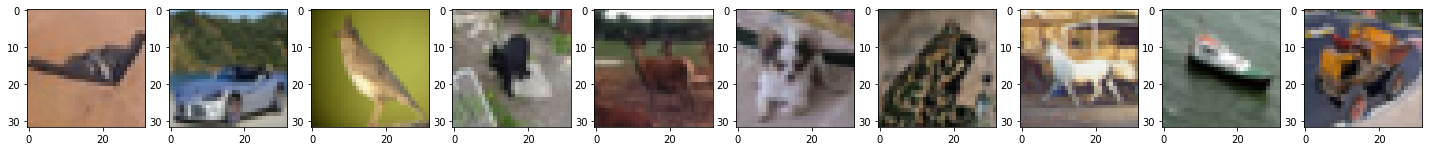

In [3]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train10==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_train10[index] #Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img)) #Отображаем изображение i-ым графиков

plt.show() #Показываем изображения

In [4]:
y_train = utils.to_categorical(y_train, 10) # превращаем в формат ohe
y_test = utils.to_categorical(y_test, 10)

In [5]:
# смотрим итоговые размеры выборок
print(y_test.shape) 
print(y_train.shape)
print(x_train.shape)
print(x_test.shape)

(10000, 10)
(50000, 10)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# Создаем сверточную сеть
batch_size = 128

model = Sequential()

model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (2,2), padding='same', activation='relu'))
model.add(Conv2D(32, (2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (2,3), padding='same', activation='relu'))
model.add(Conv2D(64, (2,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(BatchNormalization())
model.add(Conv2D(128, (2,3), padding='same', activation='relu'))
model.add(Conv2D(128, (2,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(256, (2,2), padding='same', activation='relu'))
model.add(Conv2D(256, (2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(512, (2,2), padding='same', activation='relu'))
model.add(Conv2D(512, (2,2), padding='same', activation='relu'))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

Epoch 1/100
391/391 [==============================] - 11s 18ms/step - loss: 1.8622 - accuracy: 0.2871 - val_loss: 1.7926 - val_accuracy: 0.3781
Epoch 2/100
391/391 [==============================] - 6s 16ms/step - loss: 1.2744 - accuracy: 0.5371 - val_loss: 1.0714 - val_accuracy: 0.6219
Epoch 3/100
391/391 [==============================] - 6s 16ms/step - loss: 1.0794 - accuracy: 0.6171 - val_loss: 0.9469 - val_accuracy: 0.6709
Epoch 4/100
391/391 [==============================] - 6s 16ms/step - loss: 0.9619 - accuracy: 0.6605 - val_loss: 0.8803 - val_accuracy: 0.6849
Epoch 5/100
391/391 [==============================] - 6s 16ms/step - loss: 0.8815 - accuracy: 0.6945 - val_loss: 0.8144 - val_accuracy: 0.7162
Epoch 6/100
391/391 [==============================] - 6s 16ms/step - loss: 0.8122 - accuracy: 0.7209 - val_loss: 0.7934 - val_accuracy: 0.7292
Epoch 7/100
391/391 [==============================] - 6s 16ms/step - loss: 0.7698 - accuracy: 0.7361 - val_loss: 0.7021 - val_accuracy

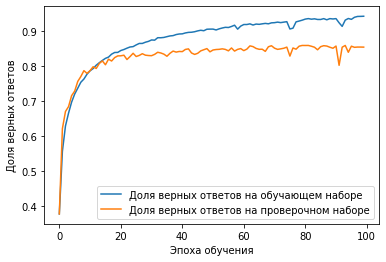

In [7]:
# обучаем сеть
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=100,
                    validation_data=(x_test, y_test),
                    verbose=1)


plt.plot(history.history['accuracy'], # Отрисовывем график точности на обучающем наборе
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')# Отрисовывем график точности на проверочном наборе
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [8]:
# делаем аугументацию базы с помощью генератора изображений
datagen = ImageDataGenerator(
    featurewise_center=True,
    rotation_range = 0.1,
    width_shift_range = 0.01,
    height_shift_range = 0.01,
    zoom_range = 0.01,
    horizontal_flip = True,
    validation_split = 0.2
)

In [9]:
train_generator = datagen.flow(x_train, y_train, batch_size=32, subset='training', shuffle=True) # Создаем обучающтй генератор
validation_generator = datagen.flow(x_train, y_train, batch_size=32, subset='validation', shuffle=True) # создаем проверомный генератор

In [10]:
# дообучаем модель на аугументированных данных 
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    verbose=1)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
1250/1250 [==============================] - 30s 23ms/step - loss: 0.6380 - accuracy: 0.8021 - val_loss: 0.3608 - val_accuracy: 0.8882
Epoch 2/50
1250/1250 [==============================] - 29s 23ms/step - loss: 0.5531 - accuracy: 0.8251 - val_loss: 0.4007 - val_accuracy: 0.8709
Epoch 3/50
1250/1250 [==============================] - 29s 24ms/step - loss: 0.5466 - accuracy: 0.8270 - val_loss: 0.3551 - val_accuracy: 0.8865
Epoch 4/50
1250/1250 [==============================] - 29s 23ms/step - loss: 0.5286 - accuracy: 0.8314 - val_loss: 0.3814 - val_accuracy: 0.8773
Epoch 5/50
1250/1250 [==============================] - 29s 23ms/step - loss: 0.5271 - accuracy: 0.8311 - val_loss: 0.3659 - val_accuracy: 0.8806
Epoch 6/50
1250/1250 [==============================] - 29s 23ms/step - loss: 0.5275 - accuracy: 0.8346 - val_loss: 0.3846 - val_accuracy: 0.8761
Epoch 7/50
1250/1250 [==============================] - 29s 23ms/step - loss: 0.5149 - accuracy: 0.8368 - val_loss: 0.3722 -

In [11]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик'] # Зададим классы для наглядности при проверке

In [13]:
#Распознаём все тестовые картинки
prediction = model.predict(x_test)

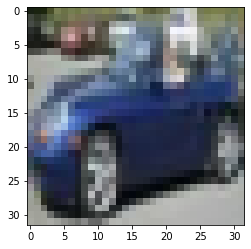

Выход сети:  [4.8413222e-07 9.9982280e-01 4.3537873e-12 3.7355397e-11 4.6378965e-13
 5.2063433e-11 1.3018777e-07 8.8307074e-13 2.3770833e-06 1.7422573e-04]
Распознанный образ:  1
Верный ответ:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Распознанный браз на картинке:  автомобиль


In [14]:
#Выбираем номер пример
n = np.random.randint(0,x_test.shape[0])

#Выводим на экран картинку
plt.imshow(Image.fromarray(x_test[n]).convert('RGBA'))
plt.show()

#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test[n])
print("Распознанный браз на картинке: ", classes[np.argmax(prediction[n])])

In [ ]:
'''
Получилось достичь точность 88.46% 
Обучая сначала на базе, потом на агументированных данных 
При обучении только на базе результат был 85%
При обучении только на агументированой базе 87.46%
'''